In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
import keras.backend as K
from keras.datasets import cifar10

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

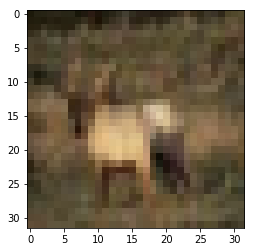

In [5]:
#Visualization
plt.imshow(X_train[3])

In [6]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

## Building a Convolutional Neural Network

In [7]:
K.clear_session()

model = Sequential()

model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3),activation = 'relu'))#(3,3) is the filter size
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation = 'relu'))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(lr=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train_cat,batch_size=128,epochs=5,verbose=2,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
 - 440s - loss: 2.0514 - acc: 0.2482 - val_loss: 1.9105 - val_acc: 0.2972
Epoch 2/5
 - 437s - loss: 1.7747 - acc: 0.3458 - val_loss: 1.6325 - val_acc: 0.3994
Epoch 3/5
 - 436s - loss: 1.5941 - acc: 0.4163 - val_loss: 1.5643 - val_acc: 0.4216
Epoch 4/5
 - 436s - loss: 1.5225 - acc: 0.4461 - val_loss: 1.4954 - val_acc: 0.4542
Epoch 5/5
 - 436s - loss: 1.4578 - acc: 0.4689 - val_loss: 1.4478 - val_acc: 0.4769


## The accuracy is low because the number of epochs are less. As you can see I have not trained the network for more number of epochs, you can increase them to get better accuracy. Also, network is not deep enough, you can increase the number of neurons in each layer and can also try on techniques like batch normalization and dropouts in order to increase the accuracy

In [9]:
model.evaluate(X_test,y_test_cat)

10000/10000 [==============================] - 39s 4ms/step


[1.434830299949646, 0.4801]

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

## Thank you 
